# Dataset : Iris

- **Implementing K-Means Clustering**

**Task: 1**
- Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features.
- Evaluate the clustering by comparing it to the actual species labels.

- Choosing the Optimal Number of Clusters

**Task: 2**

- Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset.
- Visualize the Silhouette Score for different cluster counts.
- Cluster Visualization with PCA

**Task: 3**
- Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions. Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.
- Hierarchical Clustering: Dendrogram

**Task: 4**
- Implement hierarchical clustering using the Iris dataset. Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.
- Comparing Clustering Algorithms

**Task: 5**
- Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset. Discuss the strengths and weaknesses of each approach based on the results.


# Necessary Libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y


# Implementing K-Mean Clustering

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'sepal width (cm)')

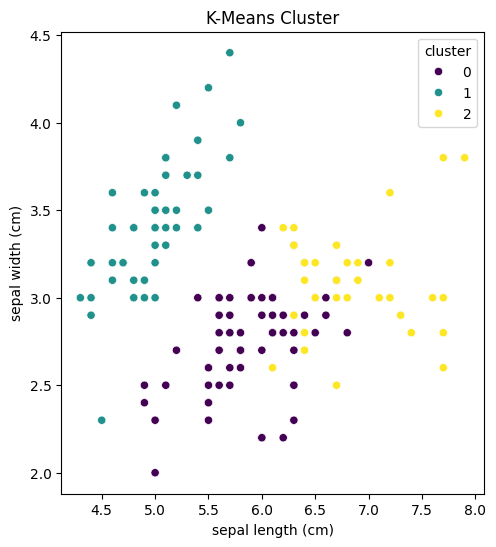

In [4]:
# visulize the k-mean cluster using a scatter plot of two features
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:, 1], hue=df['cluster'], data=df, palette = 'viridis')
plt.title('K-Means Cluster')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


Text(0, 0.5, 'sepal width (cm)')

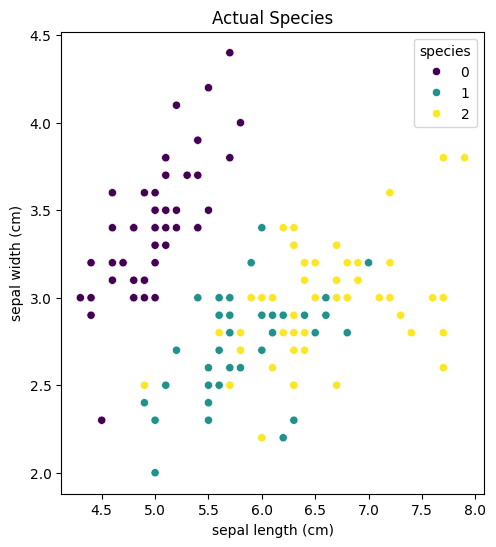

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,2)
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:, 1], hue=df['species'], data=df, palette = 'viridis')
plt.title('Actual Species')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Choosing the Optimal Number of Clusters

In [6]:
from sklearn.metrics import silhouette_score

# elbow method
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

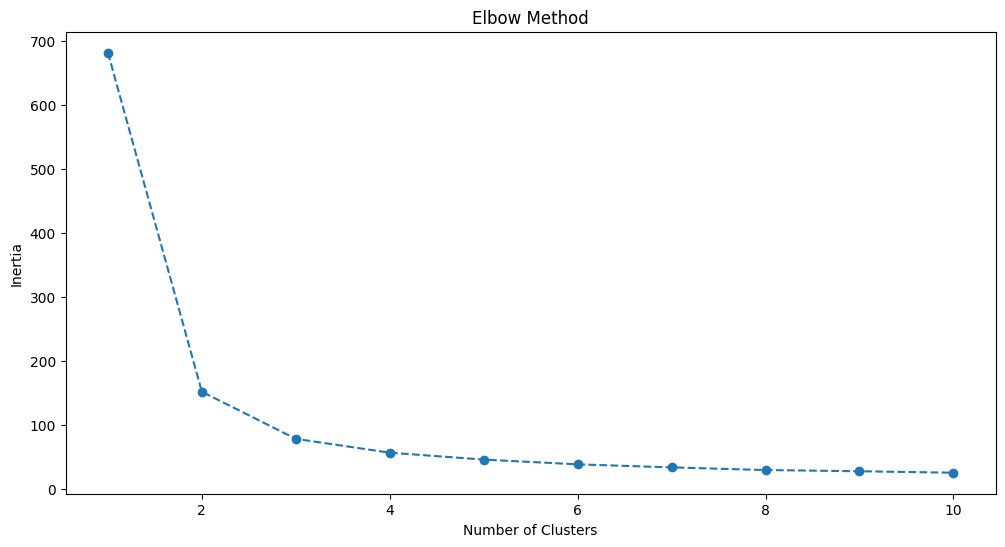

In [7]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

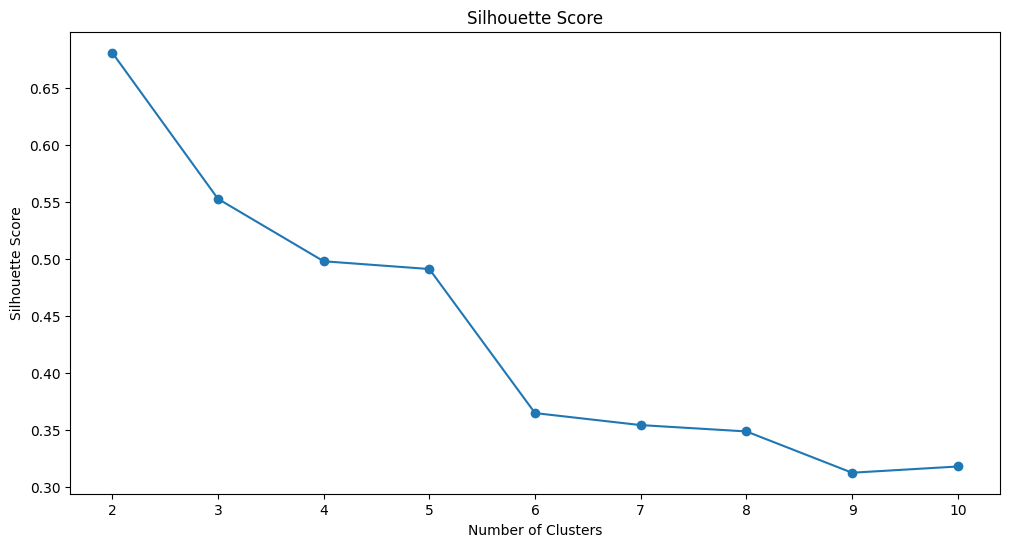

In [9]:
plt.figure(figsize=(12,6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Cluster Visualization with PCA

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


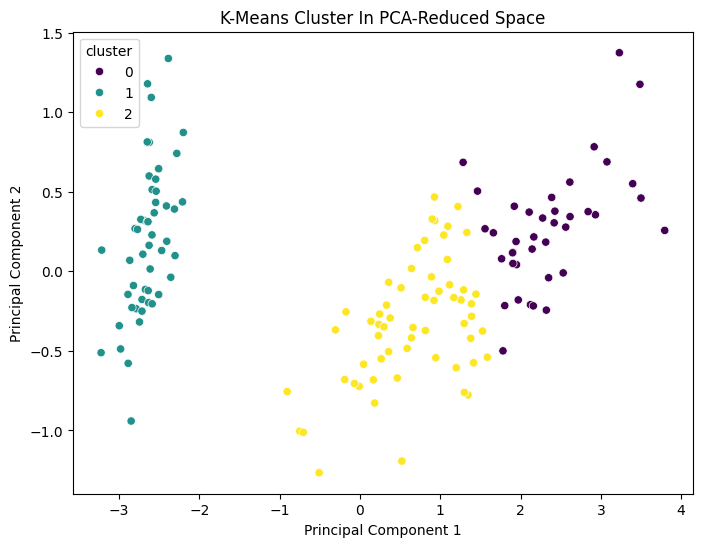

In [11]:
plt.figure(figsize =(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette = 'viridis')
plt.title('K-Means Cluster In PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Hierarchical Clustering

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

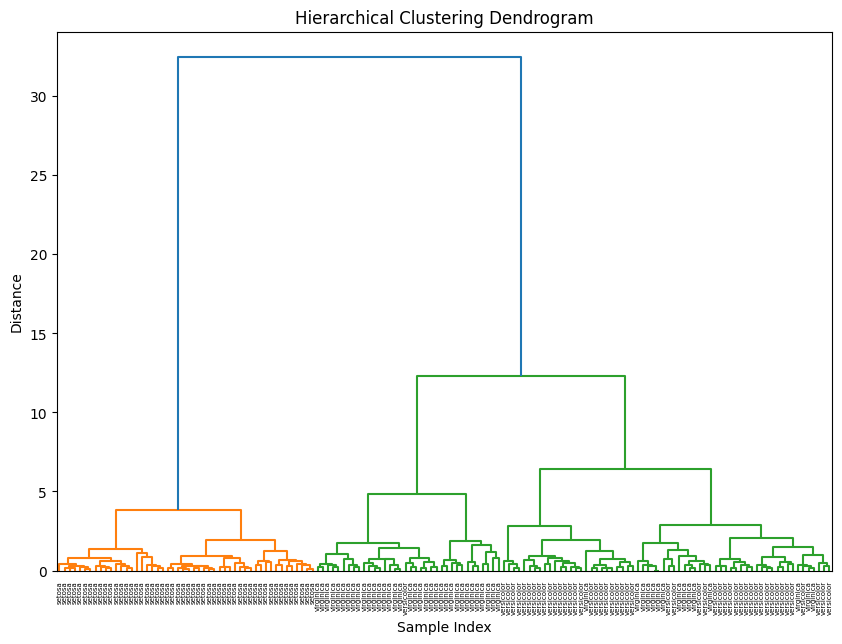

In [14]:
linked = linkage(X, 'ward')

#plot the dendrogram
plt.figure(figsize = (10,7))
dendrogram(linked,
           labels = iris.target_names[y])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Comparing Clustering Algorithms

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# applying agglomerative hierarchical Clustering

agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X)

In [19]:
# Evaluating the performance

kmeans_score = adjusted_rand_score(y, kmeans_labels)
agg_score = adjusted_rand_score(y, agg_labels)

print(f'Adjusted Rand Index for K-Means Clustering Score: {kmeans_score}')
print(f'Adjusted Rand Index for Agglomerative Hierarchical Clustering Score: {agg_score}')

Adjusted Rand Index for K-Means Clustering Score: 0.7302382722834697
Adjusted Rand Index for Agglomerative Hierarchical Clustering Score: 0.7311985567707746


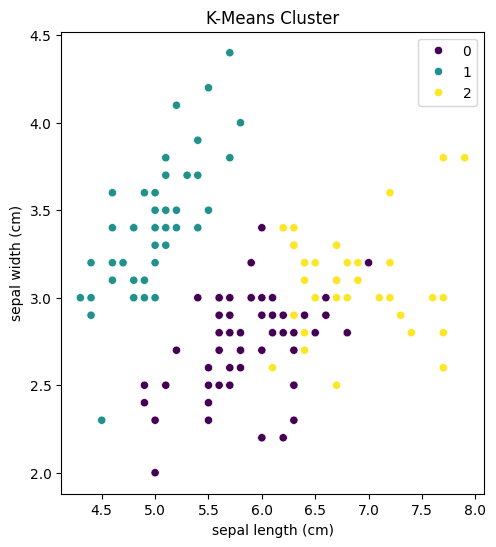

In [20]:
#visualizing the results

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:, 1], hue=kmeans_labels, data=df, palette = 'viridis')
plt.title('K-Means Cluster')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

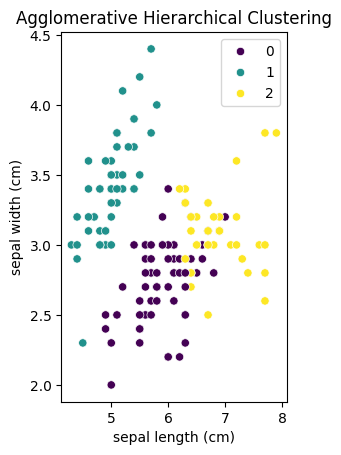

In [22]:
plt.subplot(1, 2,2)
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:, 1], hue=agg_labels, data=df, palette = 'viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Conclusion

Both K-Means and Agglomerative Hierarchical Clustering have their own strengths and weaknesses.

**K-Means is generally faster adn works well when Clusters are spherical and equally sized.**

Agglomerative Clustering on the other hands provide a more flexible approach and doesn't require specifying the number of cluster in advance but it is computationally more intensive.